# **Import Libraries and modules**

### Install Keras module for python and import it to run basic keras functions for model building.

In [0]:
# https://keras.io/
!pip install -q keras
import keras

### Import Numpy library which is usually used to store data. Also import other support libraries in keras for model building and predefined dataset loading.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


### Matplotlib is a visualization tool of python which can be used to plot graphs and display images. Here we first print the total number of images used for training. Then import matplotlib library and show the first training image.

(60000, 28, 28)


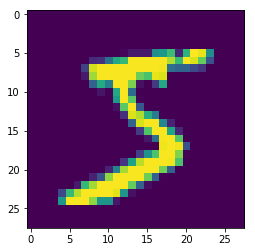

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### As the dataset contains single channel images, we reshape array to correct the input channel dimension.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalize values between 0 to 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Show labels of last 10 train data

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Show the matrix converted labels of last 10 images

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Vanilla Network
**Expectations:**


*   Have high parameters
*   Low validation accuracy




In [158]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(Convolution2D(32, 3, 3, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12
model.add(Convolution2D(16, 1, 1, activation='relu')) #12

model.add(Convolution2D(32, 3, 3, activation='relu'))#10
model.add(Convolution2D(64, 3, 3, activation='relu'))#8
model.add(Convolution2D(64, 3, 3, activation='relu'))#6

model.add(Convolution2D(10, 6, 6))
#keras.layers.AveragePooling2D(pool_size=(4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_449 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_450 (Conv2D)          (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_451 (Conv2D)          (None, 12, 12, 16)        528       
_________________________________________________________________
conv2d_452 (Conv2D)          (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_453 (Conv2D)          (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_454 (Conv2D)          (None, 6, 6, 64)          36928     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_pa

#### Configuring the remaining hyperparameters for model like loss function, optimizer and run training.

In [159]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 568us/step - loss: 0.1407 - acc: 0.9567 - val_loss: 0.0561 - val_acc: 0.9825
Epoch 2/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.0447 - acc: 0.9857 - val_loss: 0.0445 - val_acc: 0.9853
Epoch 3/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0331 - acc: 0.9900 - val_loss: 0.0357 - val_acc: 0.9893
Epoch 4/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.0256 - acc: 0.9921 - val_loss: 0.0272 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.0209 - acc: 0.9936 - val_loss: 0.0242 - val_acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0168 - acc: 0.9947 - val_loss: 0.0354 - val_acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.0157 - acc: 0.9948 - val_loss: 0.

###Result :
**Max val. accuracy**: 0.9922
**Parameters**: 88k
####*Next Goal*: Reduce parameters below 15k

###First Improvement


*   Reduce kernel size
*   Increase batch size, epochs

**Expectations:**


*   Reduced parameters
*   Higher validation accuracy







In [160]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(Convolution2D(16, 3, 3, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12
model.add(Convolution2D(10, 1, 1, activation='relu')) #12

model.add(Convolution2D(8, 3, 3, activation='relu'))#10
model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(Convolution2D(16, 3, 3, activation='relu'))#6

model.add(Convolution2D(10, 6, 6))
#keras.layers.AveragePooling2D(pool_size=(4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_456 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_457 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_458 (Conv2D)          (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_459 (Conv2D)          (None, 10, 10, 8)         728       
_________________________________________________________________
conv2d_460 (Conv2D)          (None, 8, 8, 16)          1168      
_________________________________________________________________
conv2d_461 (Conv2D)          (None, 6, 6, 16)          2320      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_pat

#### Configuring the remaining hyperparameters for model like loss function, optimizer and run training.



In [161]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 19s 324us/step - loss: 0.3236 - acc: 0.9005 - val_loss: 0.1022 - val_acc: 0.9675
Epoch 2/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.0936 - acc: 0.9717 - val_loss: 0.0800 - val_acc: 0.9741
Epoch 3/15
60000/60000 [==============================] - 5s 89us/step - loss: 0.0693 - acc: 0.9787 - val_loss: 0.0493 - val_acc: 0.9844
Epoch 4/15
60000/60000 [==============================] - 5s 89us/step - loss: 0.0551 - acc: 0.9837 - val_loss: 0.0446 - val_acc: 0.9864
Epoch 5/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.0481 - acc: 0.9852 - val_loss: 0.0524 - val_acc: 0.9830
Epoch 6/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.0414 - acc: 0.9873 - val_loss: 0.0417 - val_acc: 0.9863
Epoch 7/15
60000/60000 [==============================] - 5s 89us/step - loss: 0.0354 - acc: 0.9890 - val_loss: 0.0335 - val_a

###Result :
**Max val. accuracy**: 0.9903
**Parameters:** 11k

####*Next Goal*: Increase validation accuracy

###Second Improvement

*   Change learning rate dynamically

**Expectation:**


*   Improvement in validation accuracy





In [162]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(Convolution2D(16, 3, 3, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12
model.add(Convolution2D(10, 1, 1, activation='relu')) #12

model.add(Convolution2D(8, 3, 3, activation='relu'))#10
model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(Convolution2D(16, 3, 3, activation='relu'))#6

model.add(Convolution2D(10, 6, 6))
#keras.layers.AveragePooling2D(pool_size=(4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_463 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_464 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_465 (Conv2D)          (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_466 (Conv2D)          (None, 10, 10, 8)         728       
_________________________________________________________________
conv2d_467 (Conv2D)          (None, 8, 8, 16)          1168      
_________________________________________________________________
conv2d_468 (Conv2D)          (None, 6, 6, 16)          2320      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_pat

#### Configuring the remaining hyperparameters for model like loss function, optimizer and run training.

In [163]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 26s 433us/step - loss: 0.2436 - acc: 0.9243 - val_loss: 0.0769 - val_acc: 0.9752
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 5s 91us/step - loss: 0.0748 - acc: 0.9768 - val_loss: 0.0621 - val_acc: 0.9799
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 5s 90us/step - loss: 0.0522 - acc: 0.9839 - val_loss: 0.0470 - val_acc: 0.9849
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 5s 89us/step - loss: 0.0418 - acc: 0.9875 - val_loss: 0.0448 - val_acc: 0.9847
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [========

###Result :
**Max val. accuracy:** 0.9905
**Parameters:** 11k

####*Next Goal:* Address Overfitting

###Final Improvement

*   Add Dropout for Regularization
*   Add Batch normalization

**Expectations:**

*   Hopeful of getting accuracy above 99.4





In [164]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))#12
model.add(Convolution2D(10, 1, 1, activation='relu')) #12

model.add(Convolution2D(8, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3, activation='relu'))#6
model.add(BatchNormalization())

model.add(Convolution2D(10, 6, 6))
#keras.layers.AveragePooling2D(pool_size=(4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_470 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_250 (Bat (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_471 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_251 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_472 (Conv2D)          (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_473 (Conv2D)          (None, 10, 10, 8)         728       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6))`


#### Configuring the remaining hyperparameters for model like loss function, optimizer and run training.

In [165]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 29s 480us/step - loss: 0.1604 - acc: 0.9495 - val_loss: 0.0662 - val_acc: 0.9810
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 117us/step - loss: 0.0546 - acc: 0.9831 - val_loss: 0.0463 - val_acc: 0.9865
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 119us/step - loss: 0.0391 - acc: 0.9878 - val_loss: 0.0315 - val_acc: 0.9900
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 7s 120us/step - loss: 0.0329 - acc: 0.9898 - val_loss: 0.0330 - val_acc: 0.9892
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

###Result :
**Max val. accuracy:** 0.9941 
**Parameters:** 11k

###*Goals Acheived in 9th Epoch*

### Calculate the validation score

In [166]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.023391957638942768, 0.9933]


### Predict the label for the test images

In [167]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[1.31687395e-11 2.03458566e-08 4.01254070e-08 5.23186259e-08
  2.50984292e-13 5.88469681e-12 3.55234261e-13 9.99999642e-01
  3.26892097e-10 2.09893912e-07]
 [7.03695306e-08 6.20535303e-08 9.99999881e-01 1.11740944e-12
  8.11071002e-11 2.68622066e-13 3.25813154e-08 1.01331039e-13
  2.15821999e-10 4.91432253e-14]
 [1.54449464e-09 9.99997497e-01 3.67052948e-08 1.11970024e-08
  1.81761936e-06 7.51524343e-10 3.82032482e-07 1.92344373e-07
  7.45145030e-08 2.40392524e-08]
 [9.99988198e-01 1.39345979e-09 2.42583070e-07 1.70093291e-08
  1.17296617e-08 7.23766718e-08 1.09256753e-05 3.87678423e-09
  6.27894181e-08 5.68464714e-07]
 [5.11522248e-12 3.50892492e-12 2.30997461e-11 2.39487165e-14
  1.00000000e+00 2.46858469e-14 9.25871324e-11 7.15978969e-12
  1.63339893e-12 8.34226910e-09]
 [3.68760161e-11 9.99998808e-01 2.56535593e-08 1.73119560e-10
  4.53679746e-07 1.78416049e-11 1.68966281e-08 6.85077794e-07
  1.42756529e-09 9.13624731e-09]
 [8.27597406e-16 1.53214312e-08 3.32645397e-13 9.81852471e

### Saving layer names in a dict datatype so that we can later use it for visualization.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

### Code to Visualise the kernel extracted features of a particular layer and input images.

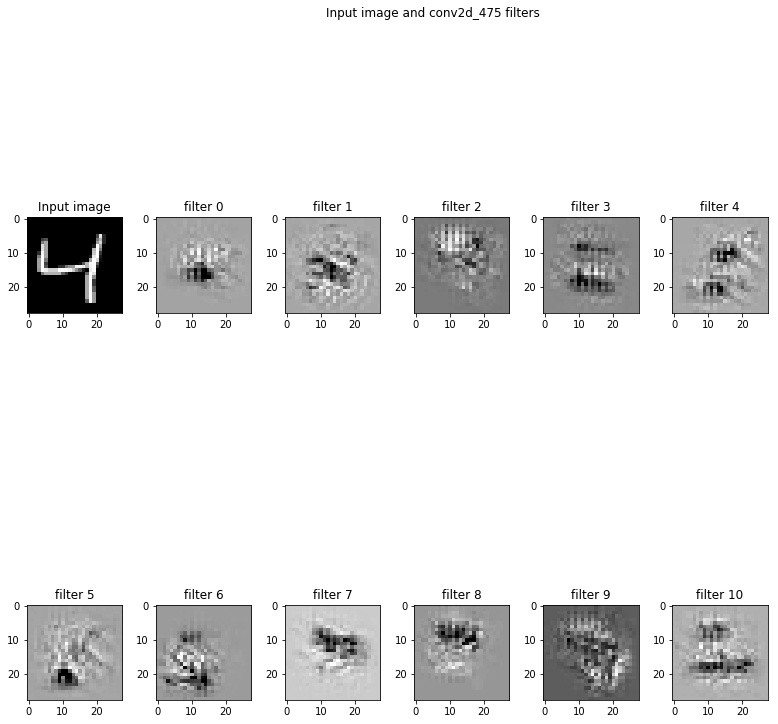

In [170]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_475'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()